In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore", category=UserWarning)

ModuleNotFoundError: No module named 'plotly'

In [5]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()
df.info()
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace = True)
df[['NumOfProducts','HasCrCard','IsActiveMember','Exited']]= df[['NumOfProducts','HasCrCard','IsActiveMember','Exited']].astype('object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
print("The Numerical variables are")
num_col= df.select_dtypes(include=[np.number]).columns.values
num_col

The Numerical variables are


array(['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary'],
      dtype=object)

In [7]:
list(df.select_dtypes(include=[np.object]).columns.values)
print("The Categorical variables are")
cat_col= df.select_dtypes(include=[np.object]).columns.values
cat_col

The Categorical variables are


array(['Geography', 'Gender', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited'], dtype=object)

First take a look at the ages of the clients

Text(0, 0.5, 'Distribution')

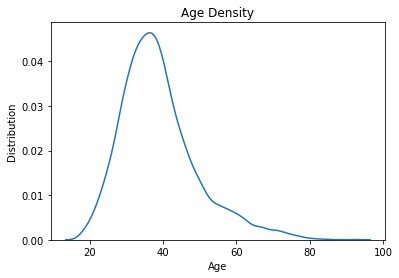

In [9]:
ax1 = plt.subplots()

ax1 = sns.distplot(a = df['Age'], hist=False)
ax1.set_title('Age Density')
ax1.set_xlabel('Age')
ax1.set_ylabel('Distribution')

We select 20 to 50 as the range of age for next part

<Figure size 432x288 with 0 Axes>

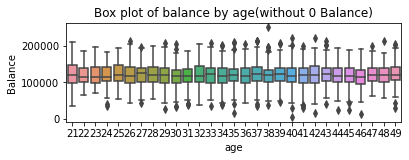

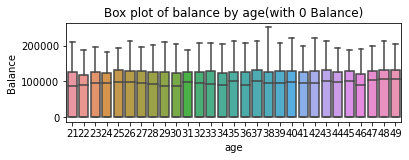

In [18]:
import matplotlib.gridspec as gridspec 


fig = plt.figure() 

ax1 = plt.subplots()
filtered_data=df[(20<df['Age'])&(df['Age']<50) & df['Balance']!=0]

ax1 = sns.boxplot(x='Age', y='Balance', data=filtered_data)
ax1.set_title('Box plot of balance by age(without 0 Balance)')
ax1.set_xlabel('age')
ax1.set_ylabel('Balance')

ax2 = plt.subplots()
filtered_data=df[(20<df['Age'])&(df['Age']<50)]

ax2 = sns.boxplot(x='Age', y='Balance', data=filtered_data)
ax2.set_title('Box plot of balance by age(with 0 Balance)')
ax2.set_xlabel('age')
ax2.set_ylabel('Balance')

gs = gridspec.GridSpec(2,1) 
ax1.set_position(gs[0].get_position(fig)) 
ax1.set_subplotspec(gs[0]) 

ax2.set_position(gs[1].get_position(fig)) 
ax2.set_subplotspec(gs[1]) 

plt.show() 


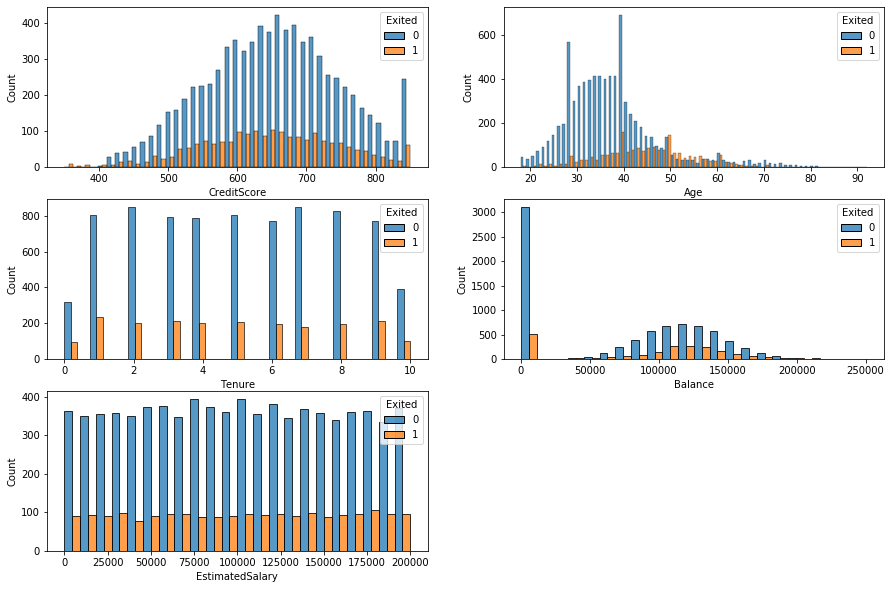

In [5]:
plt.figure(figsize = (15,10))
for i in enumerate(num_col):
    plt.subplot(3,2, i[0]+1)
    _= sns.histplot(df, x=i[1], hue = 'Exited',multiple="dodge")

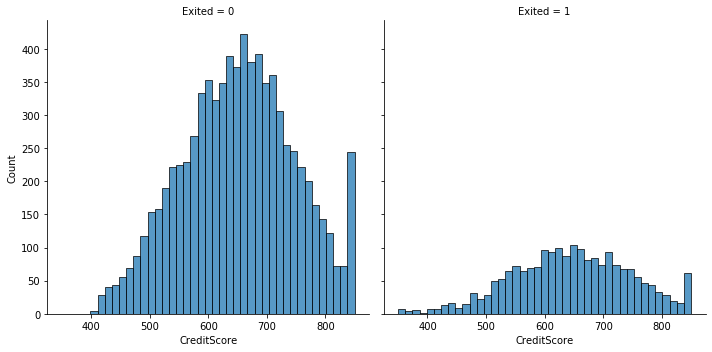

In [6]:
_= sns.displot(df, x="CreditScore", col="Exited", multiple="dodge")

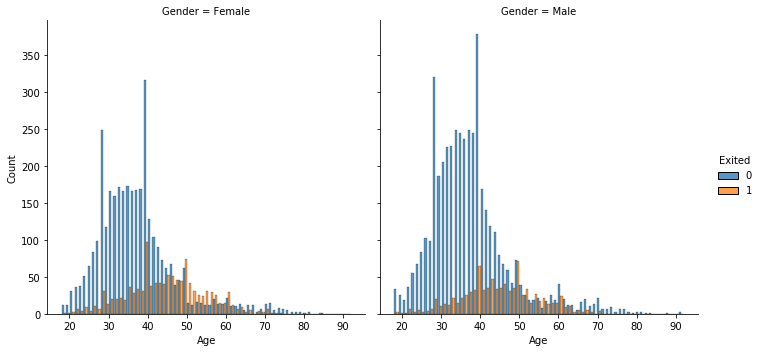

In [7]:
_= sns.displot(df, x="Age", col="Gender",hue = 'Exited', multiple="dodge")

<Figure size 720x720 with 0 Axes>

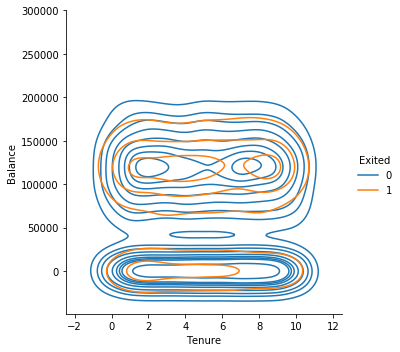

In [8]:
plt.figure(figsize= (10,10))
_= sns.displot(df, x="Tenure", y="Balance", hue="Exited", kind= 'kde')

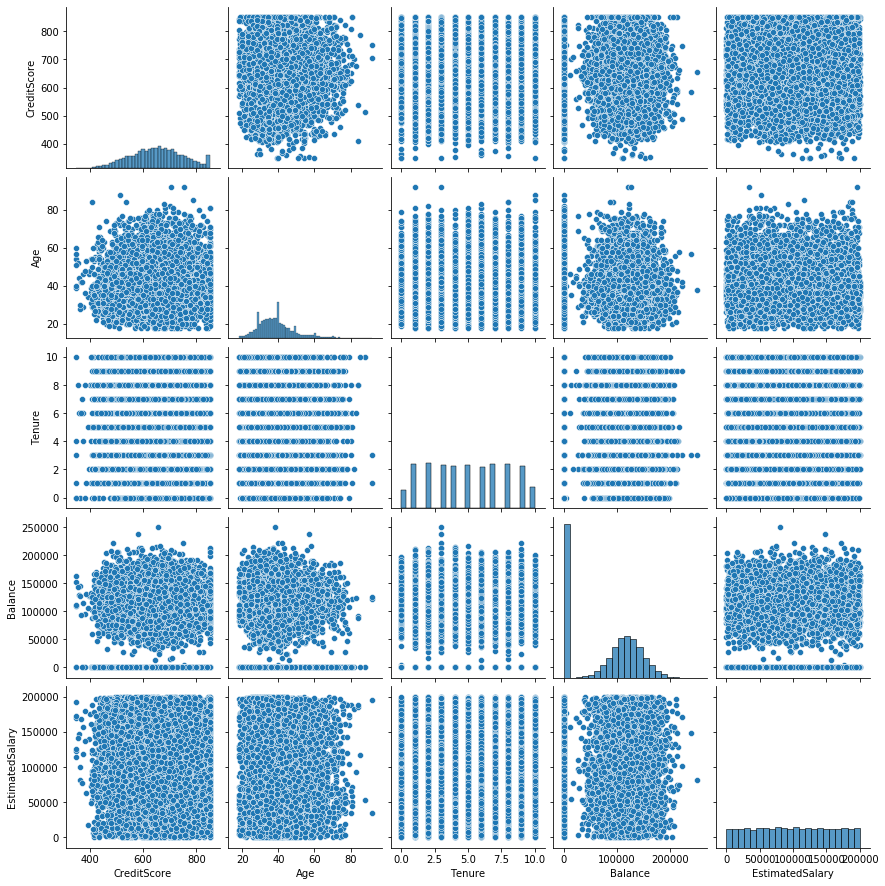

In [9]:
sns.pairplot(df[num_col])

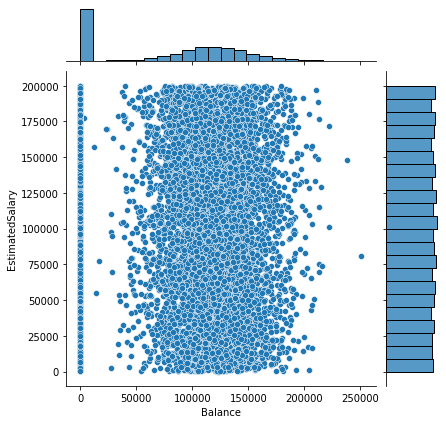

In [10]:
_ = sns.jointplot(data = df, x='Balance', y = 'EstimatedSalary')

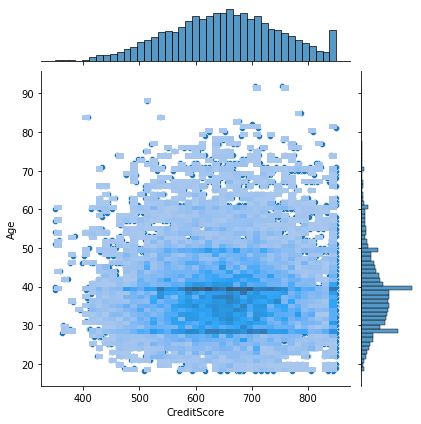

In [11]:
g = sns.jointplot(data = df, x='CreditScore', y = 'Age')
g.plot_joint(sns.histplot)

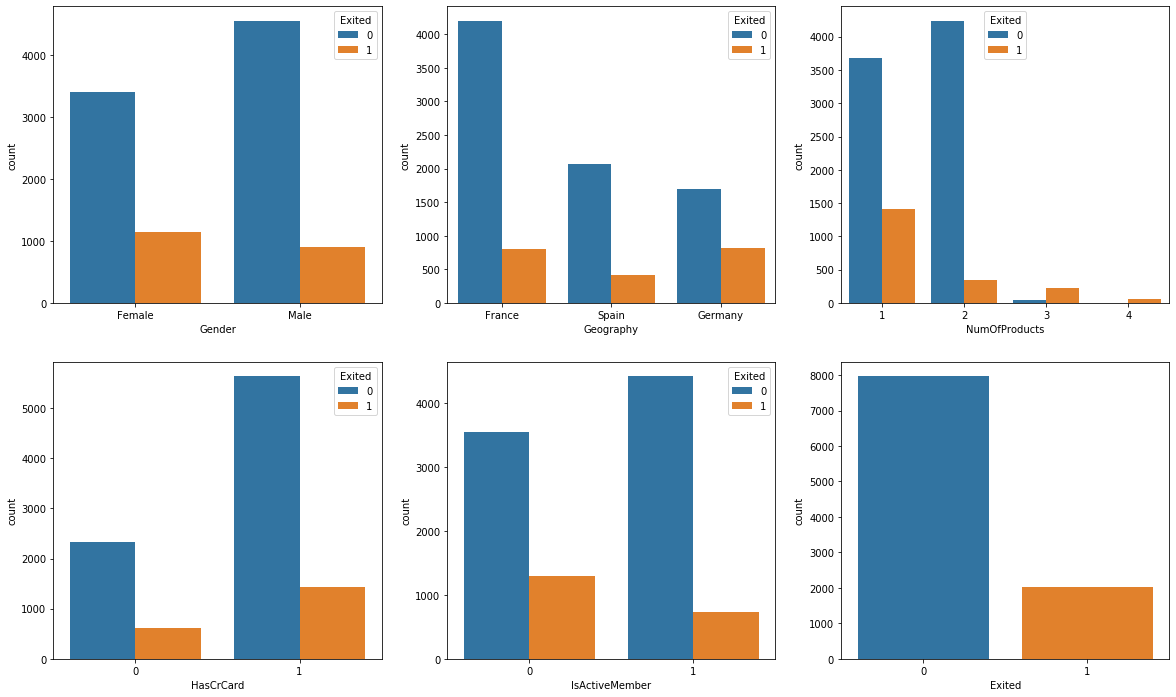

In [12]:
fig, ax= plt.subplots(2, 3, figsize=(20,12))
_=sns.countplot(x='Gender', data = df,hue='Exited', ax= ax[0][0])
_=sns.countplot(x='Geography', data = df,hue='Exited', ax= ax[0][1])
_=sns.countplot(x='NumOfProducts', data = df,hue='Exited', ax= ax[0][2])
_=sns.countplot(x='HasCrCard', data = df,hue='Exited', ax= ax[1][0])
_=sns.countplot(x='IsActiveMember', data = df,hue='Exited', ax= ax[1][1])
_=sns.countplot(x='Exited', data = df, ax= ax[1][2])

Text(0.5, 1.0, 'For Spain')

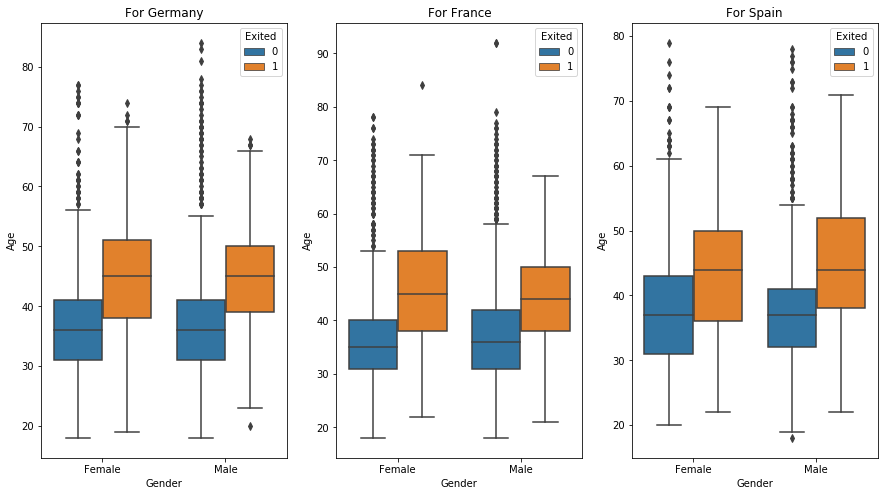

In [13]:
df_fr= df[(df['Geography'] == 'France') & (df['Balance'] != 0)]
df_sp= df[(df['Geography'] == 'Spain') & (df['Balance'] != 0)]
df_Gr= df[(df['Geography'] == 'Germany') & (df['Balance'] != 0)]
plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
_= sns.boxplot(x= 'Gender', y= 'Age', data = df_Gr, hue = 'Exited')
plt.title('For Germany')
plt.subplot(1,3,2)
_= sns.boxplot(x= 'Gender', y= 'Age', data = df_fr, hue = 'Exited')
plt.title('For France')
plt.subplot(1,3,3)
_= sns.boxplot(x= 'Gender', y= 'Age', data = df_sp, hue = 'Exited')
plt.title('For Spain')

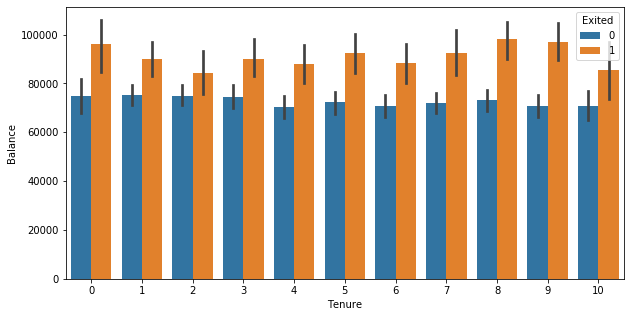

In [14]:
plt.figure(figsize=(10,5))
_= sns.barplot(x= 'Tenure', y= 'Balance', data = df, hue = 'Exited')

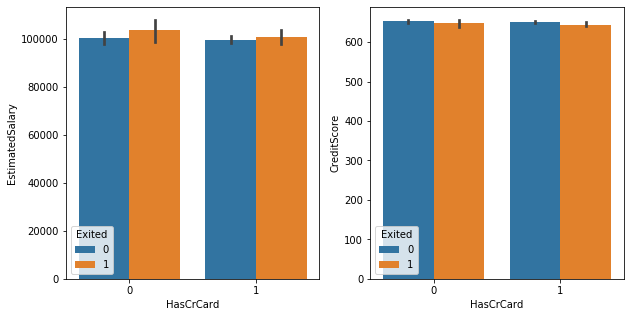

In [15]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
_= sns.barplot(x= 'HasCrCard', y= 'EstimatedSalary', data = df, hue = 'Exited')
plt.subplot(1,2,2)
_= sns.barplot(x= 'HasCrCard', y= 'CreditScore', data = df, hue = 'Exited')

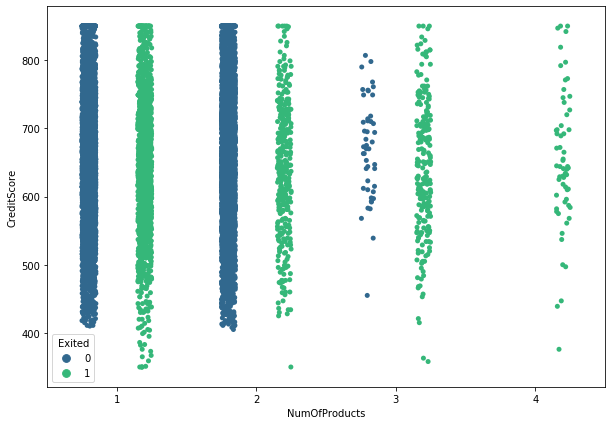

In [16]:
plt.figure(figsize=(10,7))
_=sns.stripplot(x='NumOfProducts', y='CreditScore', data=df, hue='Exited', dodge=True, palette='viridis')

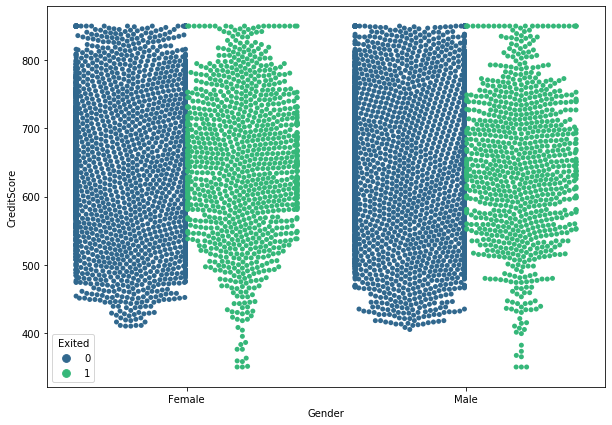

In [18]:
plt.figure(figsize=(10,7))
sns.swarmplot(x='Gender', y='CreditScore', data=df, hue='Exited', dodge=True, palette='viridis')

<Figure size 1080x504 with 0 Axes>

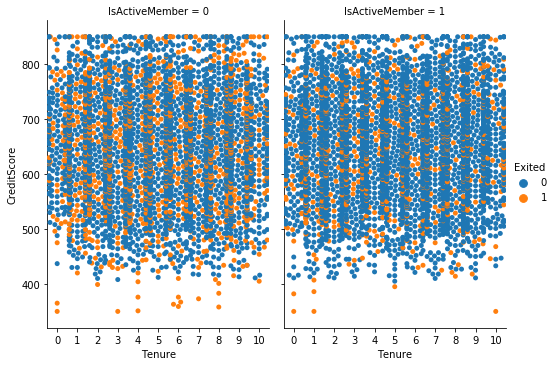

In [20]:
plt.figure(figsize=(15,7))
sns.catplot(x="Tenure", y="CreditScore", hue="Exited",
            col="IsActiveMember", aspect=.7,
            kind="swarm", data=df)

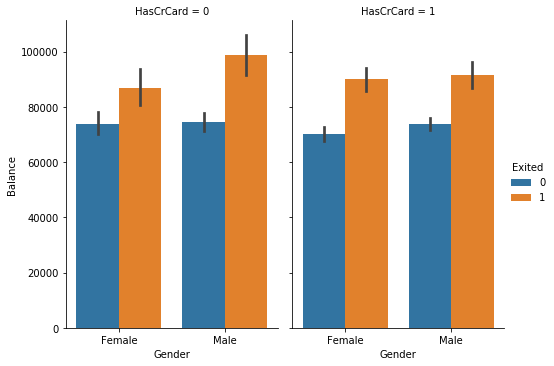

In [22]:
sns.catplot(x="Gender", y="Balance", hue="Exited",
            col="HasCrCard", aspect=.7,
            kind="bar", data=df)

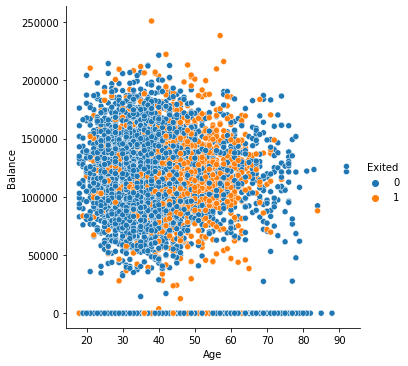

In [24]:
sns.relplot(x = 'Age',y = 'Balance',hue = 'Exited',kind = 'scatter',data = df,cmap = 'winter')

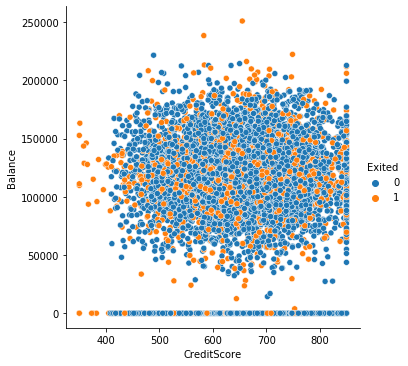

In [26]:
_= sns.relplot(x = 'CreditScore',
            y = 'Balance',
            hue = 'Exited',
            kind = 'scatter',
            data = df,
            cmap = 'winter')

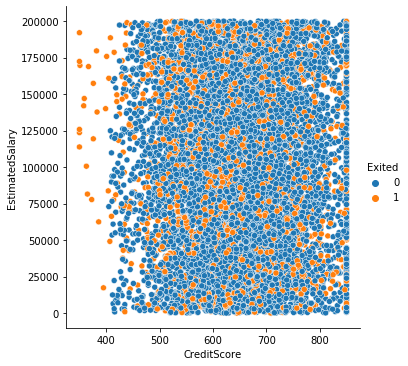

In [27]:
_= sns.relplot(x = 'CreditScore',
            y = 'EstimatedSalary',
            hue = 'Exited',
            kind = 'scatter',
            data = df,
            cmap = 'winter')